# Assignment 02 – Generative and Non-Generative Methods

#### Team number - Landon Carpenter - lc1276

# Initialization 

## Load the dataset. (0.5 x 2)

In [1]:
import urllib.request
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
# filename = 'datasets/online_shoppers_intention.csv'
# shopper = urllib.request.urlretrieve(url, filename)

In [2]:
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
filename = 'osi.csv'

response = requests.get(url)

if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
else:
    print(f"Failed getting: {url}")


## Show first 6 data points using head(). (0.5 x 2)

In [3]:
import pandas as pd
filename = 'osi.csv'
OSI = pd.read_csv(filename, header=0)
OSI["Weekend"] = OSI["Weekend"].astype(int)
OSI["Revenue"] = OSI["Revenue"].astype(int)
OSI.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(OSI['VisitorType'])[0] + 1)
OSI = OSI.drop('VisitorType', 1)

OSI.head(6)

D:\Users\carpenterl\AppData\Local\Temp\1\ipykernel_11356\444034493.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  OSI = OSI.drop('VisitorType', 1)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


## Describe the Dataframe by using describe. (0.5 x 2) 

In [4]:
OSI.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

D:\Users\carpenterl\AppData\Local\Temp\1\ipykernel_11356\534302438.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = OSI.corr()


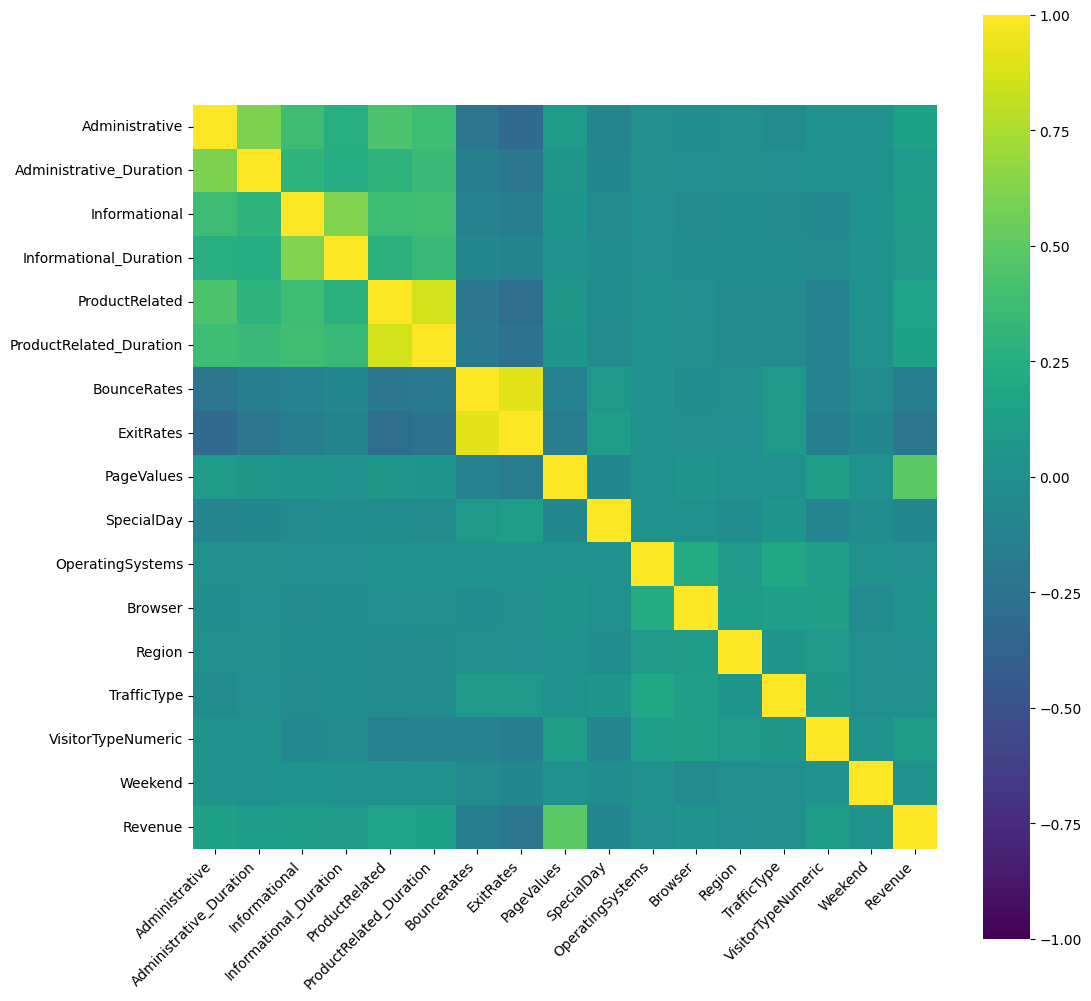

In [5]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = OSI.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("viridis", as_cmap=True),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


In [6]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 12),dpi=150)
# OSI.hist()

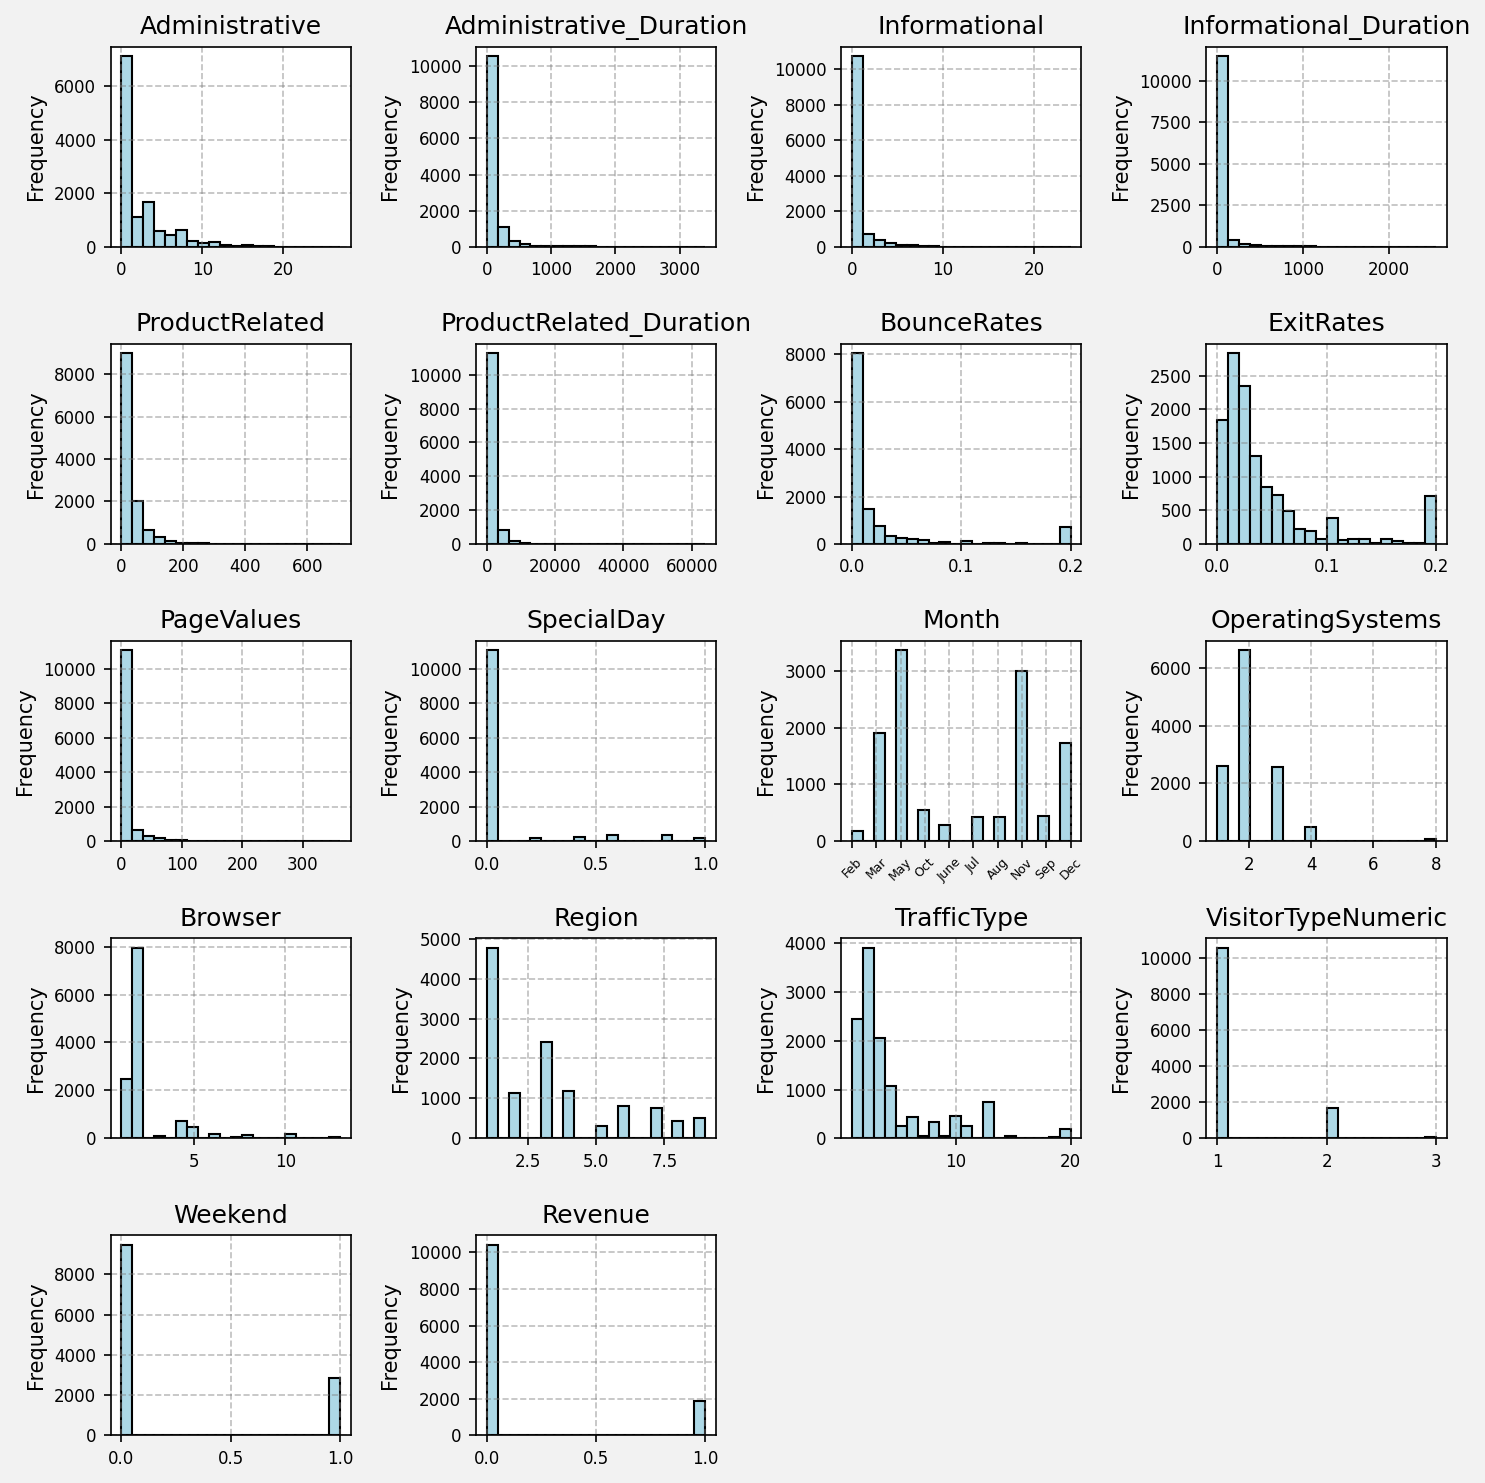

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

num_cols = len(OSI.columns)
num_rows = (num_cols + 3) // 4 

fig, axes = plt.subplots(num_rows, 4, figsize=(10, 10), dpi=150)

axes = axes.ravel()

for i, column in enumerate(OSI.columns):
    if i < num_cols:
        OSI[column].hist(ax=axes[i], bins=20, color='lightblue', edgecolor='black')
        axes[i].set_title(column, fontsize=12)
        #axes[i].set_xlabel(column, fontsize=10)
        axes[i].set_ylabel("Frequency", fontsize=10)
        axes[i].tick_params(labelsize=8)
        if i == 10:
            axes[i].tick_params(axis='x', rotation=45, labelsize=6)
        
        axes[i].grid(True, linestyle='--', alpha=0.5, color='gray')
    else:
        fig.delaxes(axes[i])  

fig.patch.set_facecolor('#f2f2f2')

plt.tight_layout()

fig.delaxes(axes[-1])  # Remove last plot (empty)
fig.delaxes(axes[-2])  # Remove second to last plot (empty)

# Show the plots
plt.show()


Explanation for the histogram plots above:

For the most part these histograms show the occurance of values for each column name. For example 'Revenue' is true 2,000 times, but false nearly 10,000. With that said the insights are mostly just showing what the distribution I described previously are like. For example 'Administrative' has a mean around 2.3 and a standard deviation around 3.3. This means that the majority of the values are between 0 and 5. The same information can be gathered from most other columns depending on the type of the information. One notable histgram is the month catagory that seems to spike around the holidays. 

## Load the dataset. (0.5 x 2)

In [8]:
import pandas as pd
filename = 'bsh.csv'
BSH = pd.read_csv(filename)

## Show first 6 data points using head(). (0.5 x 2)

In [9]:
import pandas as pd
BSH.head(6)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


## Describe the Dataframe by using describe. (0.5 x 2) 

In [10]:
BSH.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). (0.5 x 2) 

D:\Users\carpenterl\AppData\Local\Temp\1\ipykernel_11356\3117861767.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = BSH.corr()


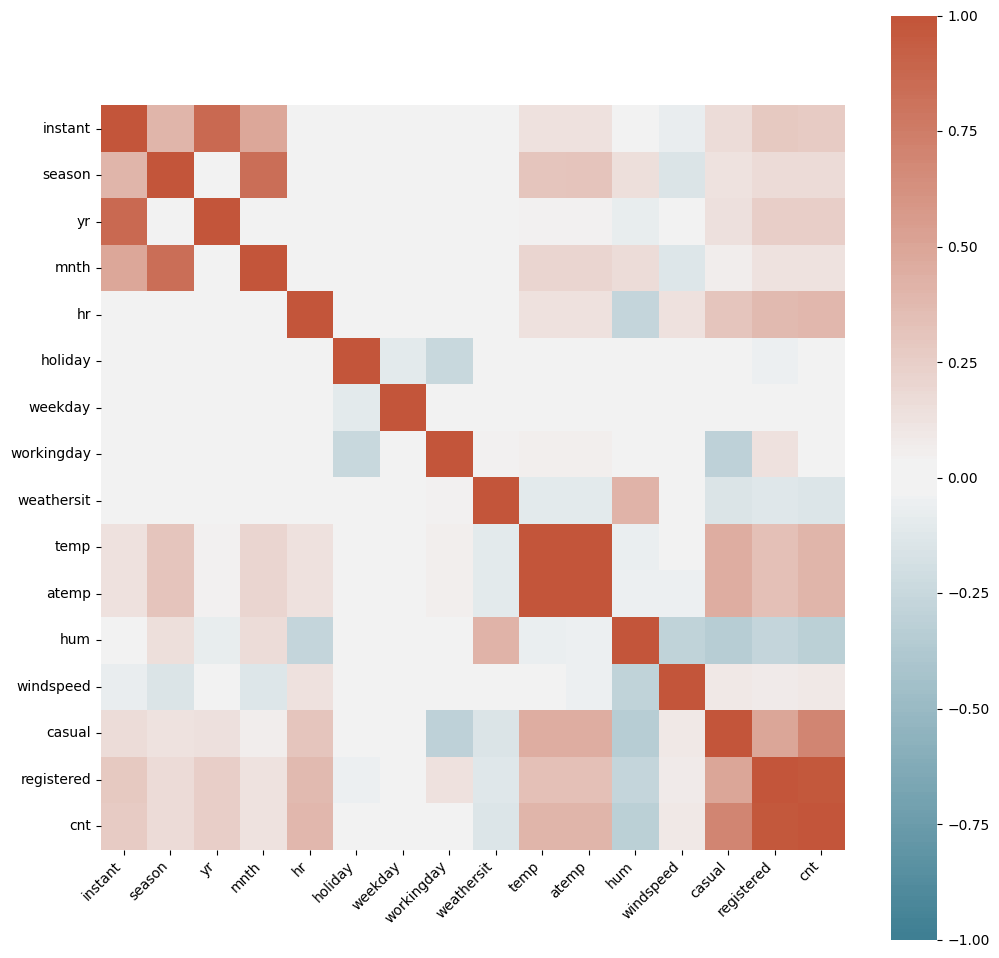

In [11]:
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = BSH.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, sep=10, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Show the distribution plots of each variable using hist function from pandas+matplotlib. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). Explain the plot distributions as much as you can. For example, you can describe the attributes of the distributions like *“From the distribution plot of variable x we can see that the mean is xx with std dev of yy and the variable seems to be skewed towards left.”* (0.5 x 2) 


array([[<AxesSubplot: title={'center': 'instant'}>,
        <AxesSubplot: title={'center': 'season'}>,
        <AxesSubplot: title={'center': 'yr'}>,
        <AxesSubplot: title={'center': 'mnth'}>],
       [<AxesSubplot: title={'center': 'hr'}>,
        <AxesSubplot: title={'center': 'holiday'}>,
        <AxesSubplot: title={'center': 'weekday'}>,
        <AxesSubplot: title={'center': 'workingday'}>],
       [<AxesSubplot: title={'center': 'weathersit'}>,
        <AxesSubplot: title={'center': 'temp'}>,
        <AxesSubplot: title={'center': 'atemp'}>,
        <AxesSubplot: title={'center': 'hum'}>],
       [<AxesSubplot: title={'center': 'windspeed'}>,
        <AxesSubplot: title={'center': 'casual'}>,
        <AxesSubplot: title={'center': 'registered'}>,
        <AxesSubplot: title={'center': 'cnt'}>]], dtype=object)

<Figure size 1800x1800 with 0 Axes>

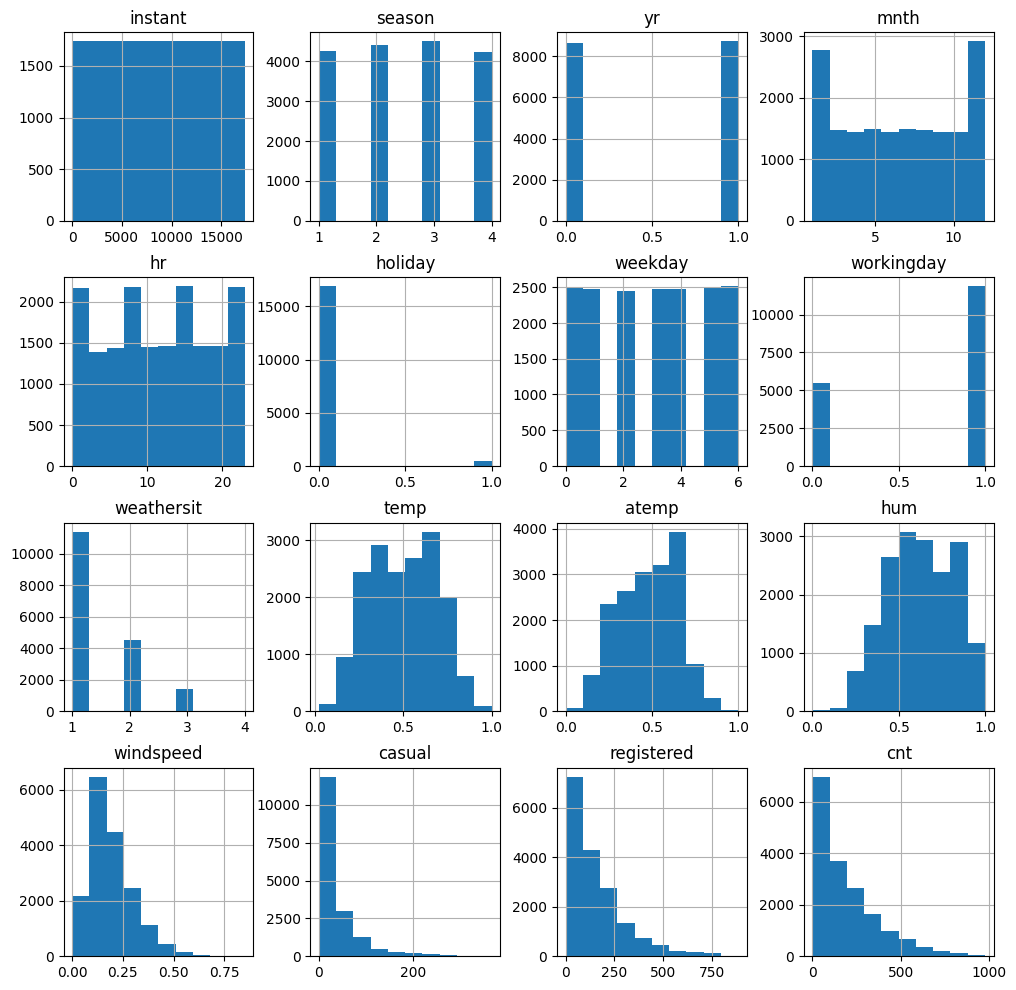

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12),dpi=150)
BSH.hist()

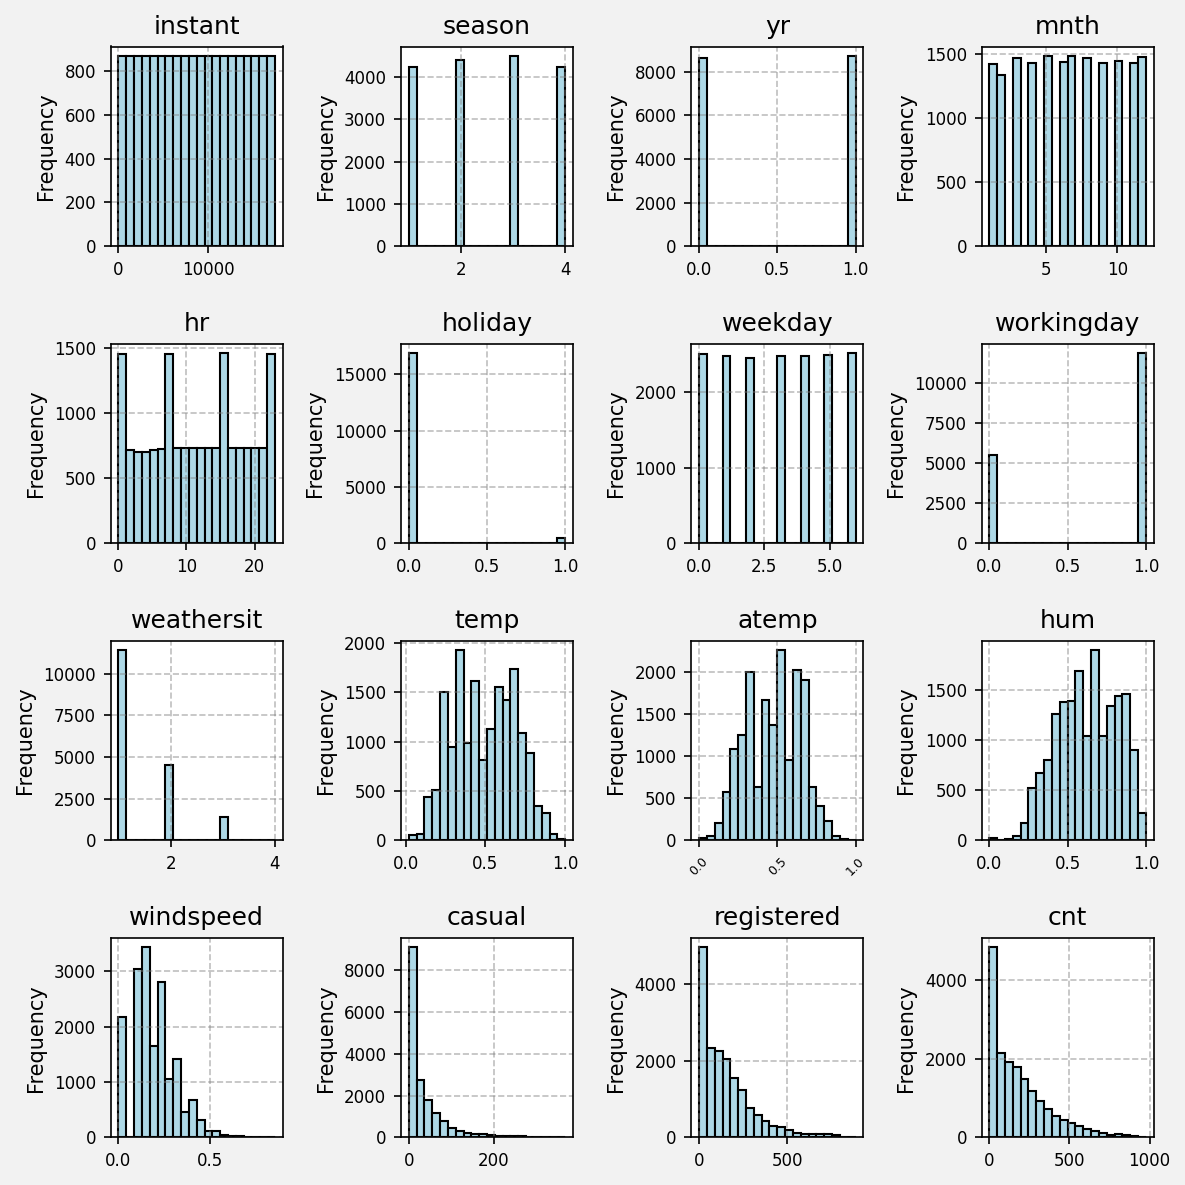

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

num_cols = len(BSH.columns)
num_rows = ((num_cols + 3) // 4) - 1

fig, axes = plt.subplots(num_rows, 4, figsize=(8, 8), dpi=150)

axes = axes.ravel()

plot_index = 0 

for i, column in enumerate(BSH.columns):
    if i == 1:
        continue  
    if plot_index < num_cols:
        BSH[column].hist(ax=axes[plot_index], bins=20, color='lightblue', edgecolor='black')
        axes[plot_index].set_title(column, fontsize=12)
        axes[plot_index].set_ylabel("Frequency", fontsize=10)
        axes[plot_index].tick_params(labelsize=8)
        if plot_index == 10:
            axes[plot_index].tick_params(axis='x', rotation=45, labelsize=6)

        axes[plot_index].grid(True, linestyle='--', alpha=0.5, color='gray')
        plot_index += 1

    else:
        fig.delaxes(axes[plot_index])

fig.patch.set_facecolor('#f2f2f2')

plt.tight_layout()

# Show the plots
plt.show()


# Intermediate Steps (Essential, no points granted)

In [14]:
OSI.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,1,0,0


manually encoding the month variable to numerical values

In [15]:
OSI['Month'] = OSI['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})

In [16]:
OSI.head(6)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorTypeNumeric,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,2,3,3,1,4,1,1,0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,2,1,3,1,0,0


In [17]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

X_OSI = OSI.loc[:, OSI.columns != 'Revenue'].to_numpy()
y_OSI = OSI.iloc[:,-1:].to_numpy()


# print(X_OSI)
# print(y_OSI)


OSIX_train, OSIX_test, OSIy_train, OSIy_test = train_test_split(X_OSI, y_OSI, test_size=0.30, random_state=0)

In [18]:
OSIX_train

array([[  1.       ,   7.125    ,   6.       , ...,   2.       ,
          1.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   1.       ,
          1.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   1.       ,
          1.       ,   0.       ],
       ...,
       [ 13.       , 331.9833333,   5.       , ...,  10.       ,
          1.       ,   1.       ],
       [  0.       ,   0.       ,   0.       , ...,  10.       ,
          1.       ,   0.       ],
       [  3.       ,  45.5      ,   0.       , ...,   3.       ,
          1.       ,   0.       ]])

In [19]:
X_BSH = BSH.loc[:, BSH.columns != 'cnt'].to_numpy()
y_BSH = BSH.iloc[:,-1:].to_numpy()

# print(X_BSH)
# print(y_BSH)

BSHX_train, BSHX_test, BSHy_train, BSHy_test = train_test_split(X_BSH, y_BSH, test_size=0.30, random_state=0)

# Classification (total 48)
## AdaBoost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

imported adaboost classifier from sklearn.ensemble. This is a boosting algorithm that uses decision trees as the base estimator.

In [20]:
from sklearn.ensemble import AdaBoostClassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

started by using default values for clf and then tried sever different variations that I thought might perform well. 

I ended up choosing 100 estimators with a relatively smaller learning rate (to minimize overfitting), but a larger learning rate than the default. I also chose to use the default algorithm and a random state of 0. I didnt see drastic swings in performance when changing hyper parameters, but this did a good job of balancing performance and overfitting and predicted true values slightly better, which I viewed as important because of the class imbalance.

The approach I'm using here is more traditional/common than the next one, I'm using a max depth of 1 to create a stump. The next example that I'll talk about later is a random forest. I also tried SVM that too a long time to run and didn't perform as well as the other two (even when changing the kernel to something non-linear).

In [82]:
clf = AdaBoostClassifier(
    #using 100 weak learners
    n_estimators=100, 
    #learning rate of 1
    learning_rate=.5,
    #using SAMME.R real boosting algorithm
    algorithm='SAMME.R',
    #for reproducibility
    random_state=0,
    #using a decision tree as the base classifier
    base_estimator=DecisionTreeClassifier(max_depth=1)
    )


### Train classifier on train data and explain what you did. (1.5) 

using the classifier I specified above, I fit the training data to the training labels.

In [83]:
ada_fit = clf.fit(OSIX_train, OSIy_train)

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Test/fit classifier test data and explain what you did. (1.5)

Using the classifier that was fit above, I'm now making predictions on the test data.

In [84]:
OSIy_pred = ada_fit.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

prints out the results from the predictions above. This shows precision, recall, and f1-score. Along with acuracy, macro avg, weighted avg, and support. I t also shows the precision, recall, and f1-score for each class this is important because of the class imbalance, and shows me that the model has trouble with the minority class.

In [85]:
print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3077
           1       0.67      0.54      0.60       622

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.87      0.88      0.87      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


This shows the predictions along the X axis and true labels along the Y axis so you can clearly see the correct and incorrect predictions. 

<Figure size 187.5x187.5 with 0 Axes>

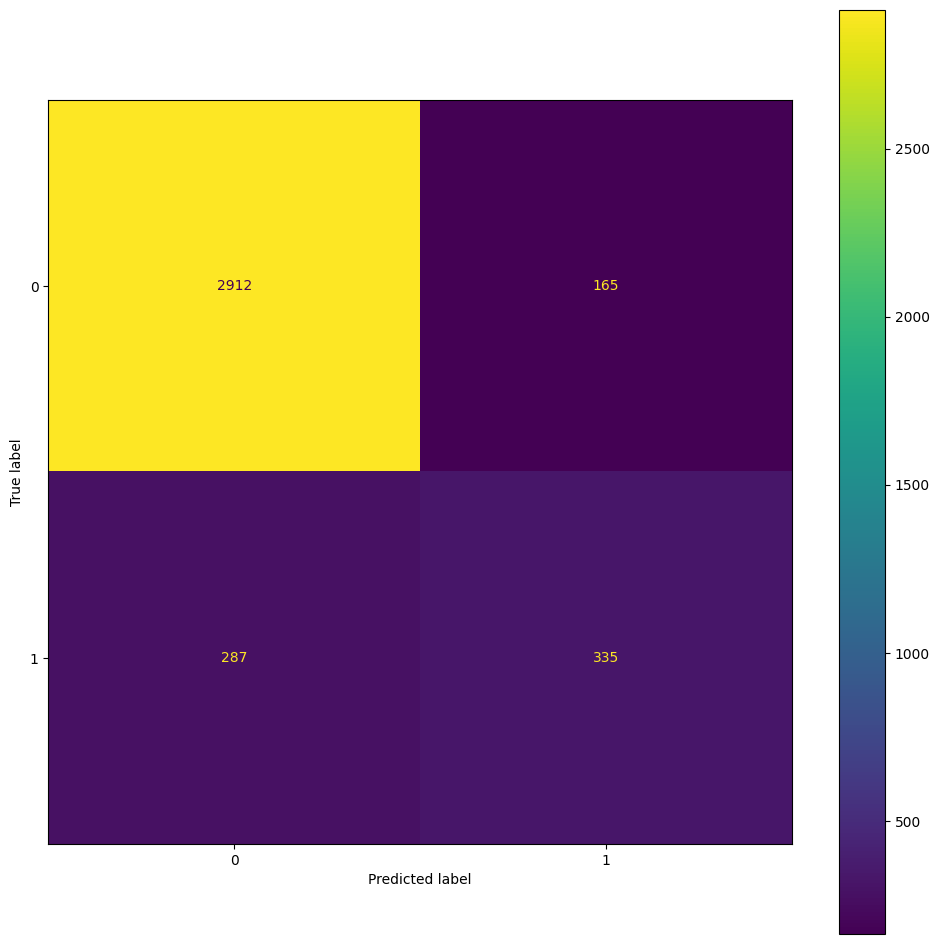

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix = confusion_matrix(OSIy_test, OSIy_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, OSIX_test, OSIy_test)

### Repeat the same with a different parameter set and compare the result with (2)


The second approach was more rhobust and used a random forest classifier. It performed slightly better, but took longer to train. I also accounted for the clas imbalance by using the class_weight parameter so it does better at predicting true values.

In [87]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [88]:

clf = AdaBoostClassifier(
    #using 100 weak learners
    n_estimators=250, 
    #learning rate of 1.5, not sure how I feel about it being this high. but the default is 1. 
    learning_rate=.1,
    #using SAMME.R real boosting algorithm
    algorithm='SAMME.R',
    #for reproducibility
    random_state=0,
    #using a random forest as the base classifier
    base_estimator=RandomForestClassifier(max_depth=3, min_samples_split=2, criterion='entropy', class_weight='balanced')
    )


fit the model

In [89]:
ada_fit = clf.fit(OSIX_train, OSIy_train)

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


predict the test data

In [90]:
OSIy_pred = ada_fit.predict(OSIX_test)

show the results, same structure as my expanation above similar results, but slightly better.

In [91]:
print(classification_report(OSIy_test, OSIy_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3077
           1       0.57      0.82      0.67       622

    accuracy                           0.87      3699
   macro avg       0.77      0.85      0.79      3699
weighted avg       0.89      0.87      0.87      3699



Confusion matrix for the random forest classifier. This shows the predictions along the X axis and true labels along the Y axis so you can clearly see the correct and incorrect predictions.

<Figure size 187.5x187.5 with 0 Axes>

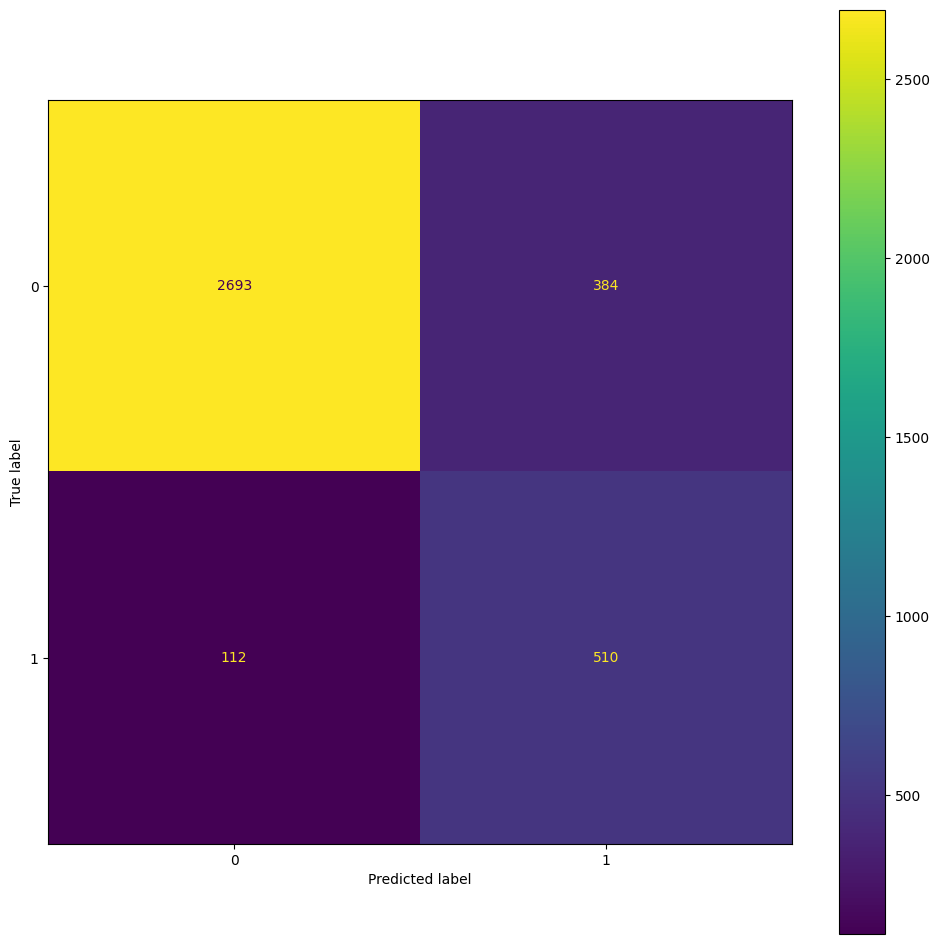

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay
from seaborn import set_palette

plt.figure(figsize=(2.5,2.5),dpi=75)
set_palette("Paired")

conf_matrix = confusion_matrix(OSIy_test, OSIy_pred)
ConfusionMatrixDisplay.from_estimator(ada_fit, OSIX_test, OSIy_test)

## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

Similar to the first ada boost classifier, I'm using a gradient boost classifier. it uses decision trees and tries to minimise the loss from one tree to the next. I'm using the default parameters for this one, n_estimators=100, learning_rate=0.5 (same as above), max_depth=1 (depth of the tree), random_state=0 (for reproducability).

In [94]:
gb_clf = GradientBoostingClassifier(
    n_estimators=100,      
    learning_rate=.5,       
    random_state=0,
    max_depth=1           
)

### Train classifier on train data and explain what you did. (1.5) 

fit the model on the training data

In [95]:
gb_clf.fit(OSIX_train, OSIy_train)

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.5, max_depth=1, random_state=0)

### Test/fit classifier test data and explain what you did. (1.5)

make predictions on the test data

In [96]:
OSIy_pred_gboost = gb_clf.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

print accuracy score and then the classification report like above.

In [97]:
accuracy = accuracy_score(OSIy_test, OSIy_pred_gboost)
accuracy

0.8834820221681535

In [98]:
print(classification_report(OSIy_test, OSIy_pred_gboost))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3077
           1       0.69      0.56      0.62       622

    accuracy                           0.88      3699
   macro avg       0.80      0.76      0.78      3699
weighted avg       0.88      0.88      0.88      3699



### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


visualize the results. Same explanation as above. Results for xgboost vs adaboost are very similar.

<Figure size 375x375 with 0 Axes>

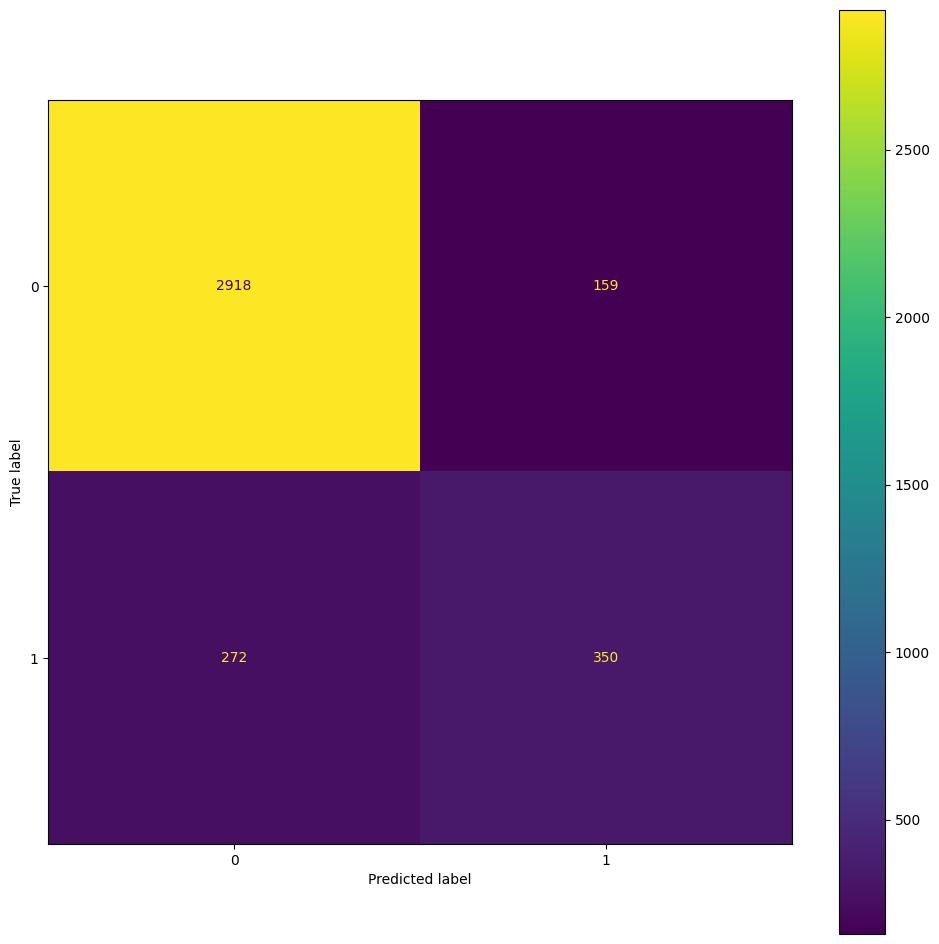

In [99]:
gb_conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_gboost)

plt.figure(figsize=(5, 5), dpi=75)
set_palette("Paired")

# Create a ConfusionMatrixDisplay object and display it
ConfusionMatrixDisplay(gb_conf_matrix).plot()

### Repeat the same with a different parameter set and compare the result with (2)


Similar stes to above, but this is a more rhobust model. It performs slightly better, but I believe has the best metrics so far. 

In [79]:
gb_clf = GradientBoostingClassifier(
    n_estimators=250,      
    learning_rate=.1,       
    random_state=0,
    max_depth=3    
)

gb_clf.fit(OSIX_train, OSIy_train)

OSIy_pred_gboost = gb_clf.predict(OSIX_test)

accuracy = accuracy_score(OSIy_test, OSIy_pred_gboost)
print(f"Accuracy: {accuracy}")

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8926736955934036


In [80]:
print(classification_report(OSIy_test, OSIy_pred_gboost))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3077
           1       0.72      0.59      0.65       622

    accuracy                           0.89      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.89      0.89      3699



<Figure size 375x375 with 0 Axes>

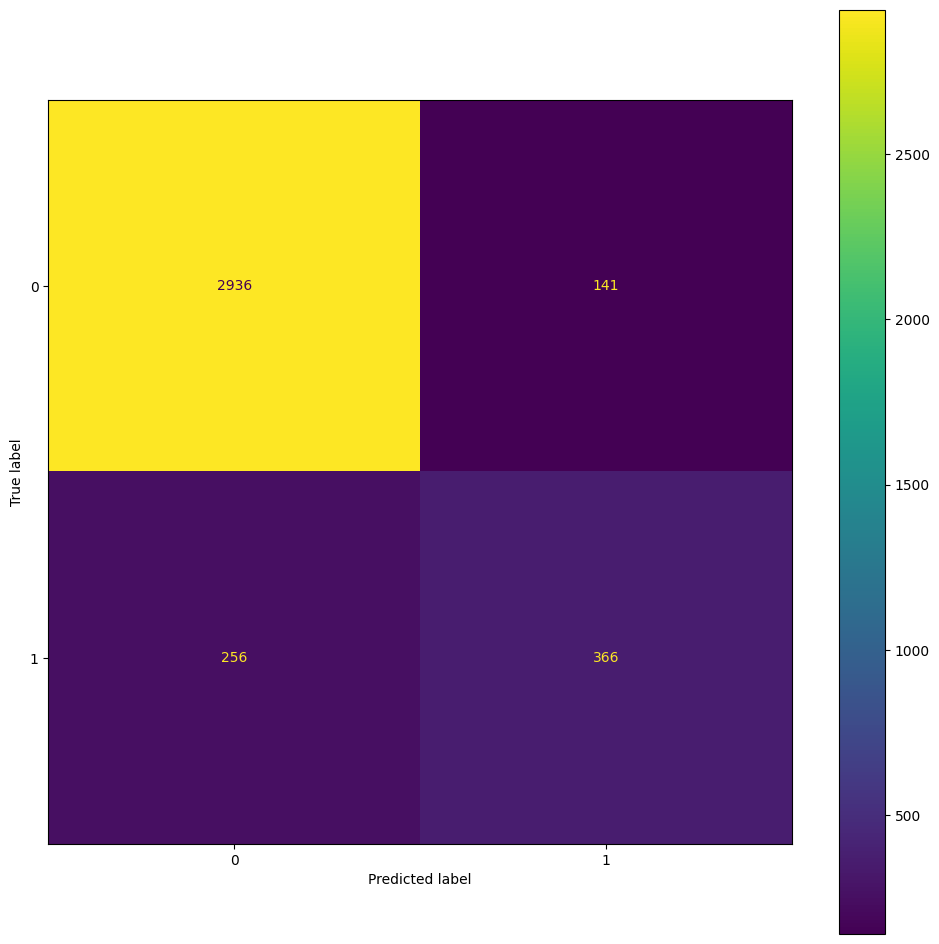

In [81]:
gb_conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_gboost)

plt.figure(figsize=(5, 5), dpi=75)
set_palette("Paired")

# Create a ConfusionMatrixDisplay object and display it
ConfusionMatrixDisplay(gb_conf_matrix).plot()

## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

import xgb

In [101]:
import xgboost as xgb

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

created a xgb classifier basically just with the default values. 

In [102]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,  
    learning_rate=0.1,   
    random_state=0,
    max_depth=3, 
)

### Train classifier on train data and explain what you did. (1.5) 

fit to training data

In [104]:
xgb_clf.fit(OSIX_train, OSIy_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

### Test/fit classifier test data and explain what you did. (1.5)

make predictions on the test data with my fit model

In [105]:
OSIy_pred_xgb = xgb_clf.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

In [106]:
accuracy_xgb = accuracy_score(OSIy_test, OSIy_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb:.2f}')

Accuracy (XGBoost): 0.90


### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


gather and print the results, very similar to the other models. Maybe slightly better.

In [109]:
print(classification_report(OSIy_test, OSIy_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3077
           1       0.74      0.60      0.66       622

    accuracy                           0.90      3699
   macro avg       0.83      0.78      0.80      3699
weighted avg       0.89      0.90      0.89      3699



In [110]:
xgb_conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_xgb)

<Figure size 375x375 with 0 Axes>

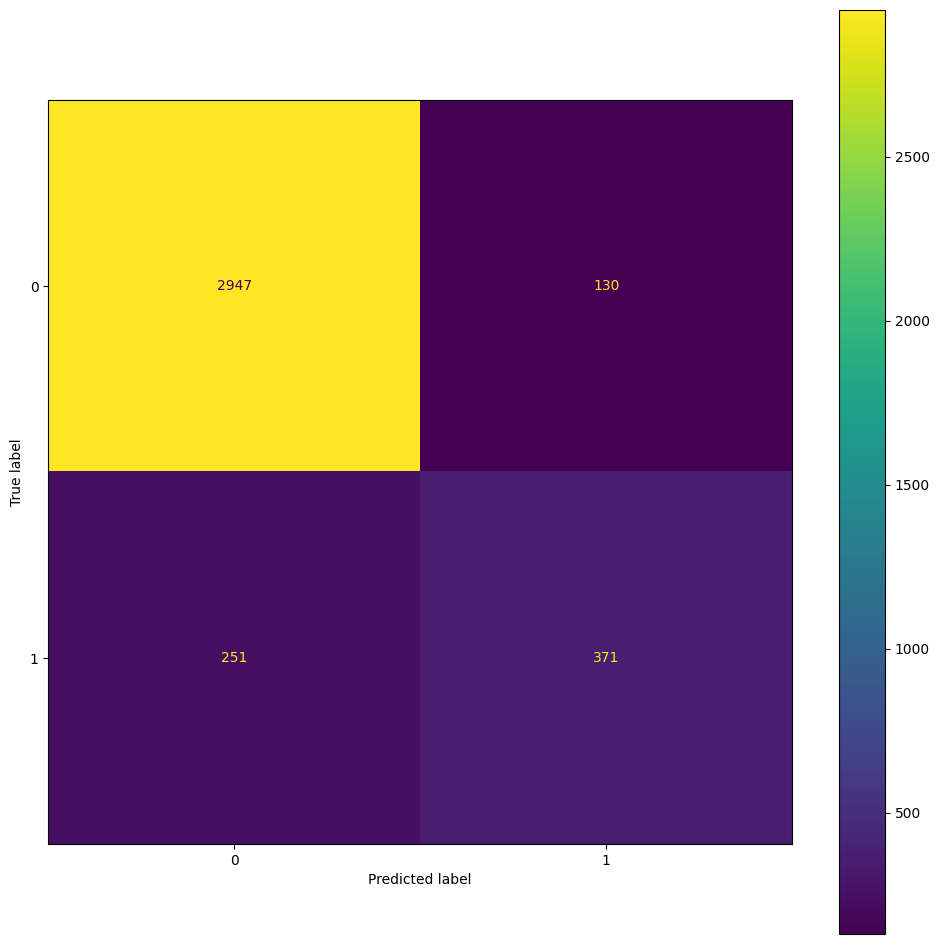

In [111]:
plt.figure(figsize=(5, 5), dpi=75)
ConfusionMatrixDisplay(xgb_conf_matrix).plot()

### Repeat the same with a different parameter set and compare the result with (2)


added more estimators, and increased the depth, but it performed slightly worse than the previous model. 

In [131]:
xgb_clf= xgb.XGBClassifier(
    n_estimators=250,          
    learning_rate=0.1,          
    random_state=0,
    max_depth=5, 
    #account for imbalanced classes
    scale_pos_weight=2.5
)

xgb_clf.fit(OSIX_train, OSIy_train)

OSIy_pred_xgb = xgb_clf.predict(OSIX_test)

accuracy_xgb = accuracy_score(OSIy_test, OSIy_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb:.2f}')

Accuracy (XGBoost): 0.89


In [132]:
print(classification_report(OSIy_test, OSIy_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3077
           1       0.67      0.68      0.68       622

    accuracy                           0.89      3699
   macro avg       0.80      0.81      0.81      3699
weighted avg       0.89      0.89      0.89      3699



<Figure size 375x375 with 0 Axes>

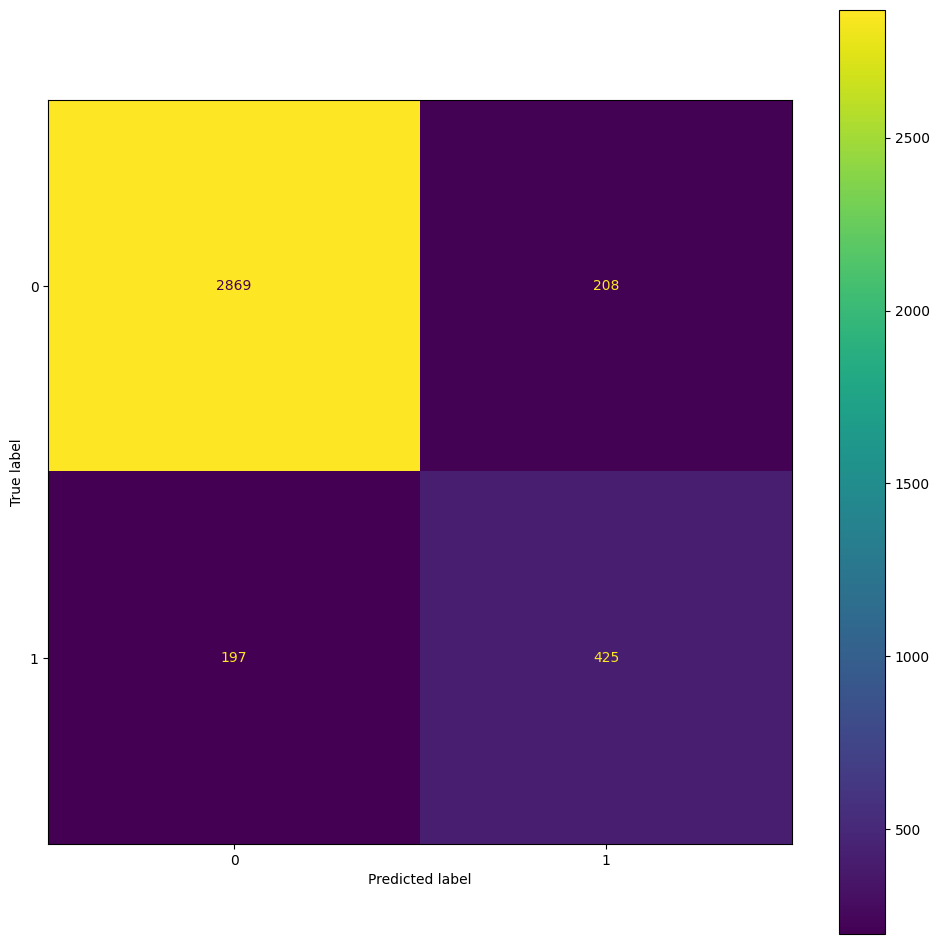

In [133]:
xgb_conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_xgb)

plt.figure(figsize=(5, 5), dpi=75)
ConfusionMatrixDisplay(xgb_conf_matrix).plot()

## Bagging
### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

In [134]:
from sklearn.ensemble import BaggingClassifier

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

create a stadard bagging classifier with the default values.

In [146]:
bagging_clf = BaggingClassifier(
    n_estimators=100,
    random_state=0,
)

### Train classifier on train data and explain what you did. (1.5) 

fit the model to the training data

In [147]:
bagging_clf.fit(OSIX_train, OSIy_train)

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(n_estimators=100, random_state=0)

### Test/fit classifier test data and explain what you did. (1.5)

make predictions on the test data

In [148]:
OSIy_pred_bagging = bagging_clf.predict(OSIX_test)

### Calculate accuracy and explain what you did. (1.5)

In [149]:
accuracy_bagging = accuracy_score(OSIy_test, OSIy_pred_bagging)
print(f'Accuracy (Bagging): {accuracy_bagging:.2f}')

Accuracy (Bagging): 0.89


### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


In [150]:
print(classification_report(OSIy_test, OSIy_pred_bagging))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3077
           1       0.72      0.58      0.64       622

    accuracy                           0.89      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.88      0.89      0.89      3699



Wasnt expecting this, but it didnt predict any true values. I have seen this before with imbalanced datasets, but I wasn't expecting  it here.

Corrected my hyperparameters and now it is predicting for both classes. performance is similar to the other models.

<Figure size 375x375 with 0 Axes>

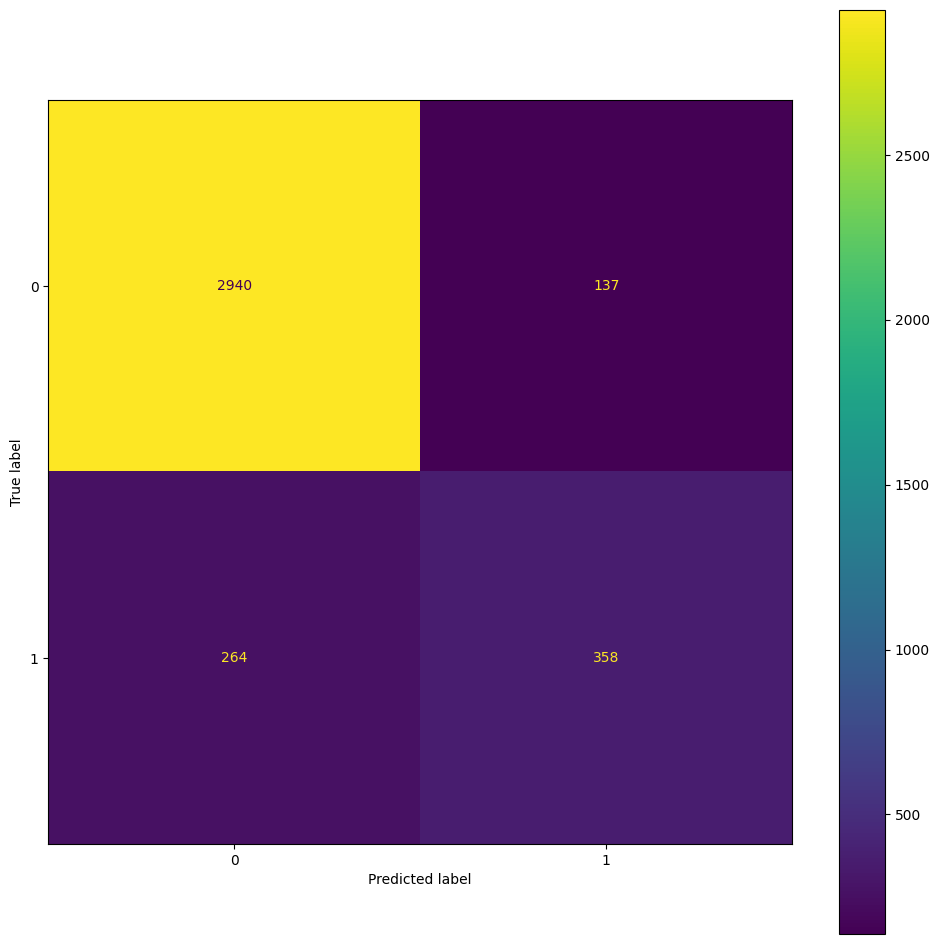

In [151]:
conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_bagging)

plt.figure(figsize=(5, 5), dpi=75)
ConfusionMatrixDisplay(conf_matrix).plot()

### Repeat the same with a different parameter set and compare the result with (2)


Tried a lot of differnt hyperparameters such as max_samples, bootstrap, and warm start in addition to the ones shown in the classifier. If it didn't make a large difference I didn't include it in the final model.

In the final model I used a lot of estimators (250) and used the xgb_classifier created on the last problem to see how it would perform and it seems to do pretty well! Overfitting has been a concern on each model, but I dont think this is overfitting too much.

In [164]:
import numpy as np
class_weights = dict(zip([0, 1], np.bincount(OSIy_train.ravel())))

bagging_clf = BaggingClassifier(
    n_estimators=250,
    random_state=0,
    base_estimator=xgb_clf
)

bagging_clf.fit(OSIX_train, OSIy_train)

OSIy_pred_bagging = bagging_clf.predict(OSIX_test)

accuracy_bagging = accuracy_score(OSIy_test, OSIy_pred_bagging)
print(f'Accuracy (Bagging): {accuracy_bagging:.2f}')

D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Users\carpenterl\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy (Bagging): 0.90


Results for this model look pretty good. 

In [167]:
print(classification_report(OSIy_test, OSIy_pred_bagging))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3077
           1       0.70      0.67      0.68       622

    accuracy                           0.90      3699
   macro avg       0.82      0.81      0.81      3699
weighted avg       0.89      0.90      0.89      3699



<Figure size 375x375 with 0 Axes>

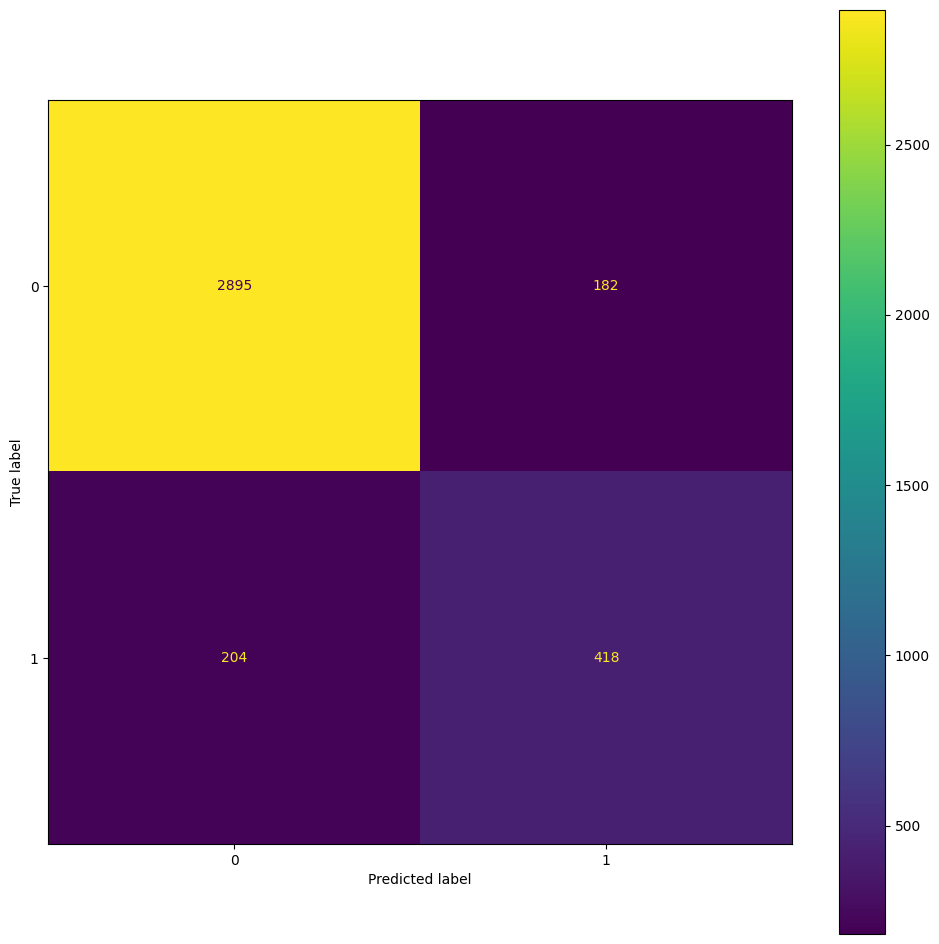

In [169]:
conf_matrix = confusion_matrix(OSIy_test, OSIy_pred_bagging)

plt.figure(figsize=(5, 5), dpi=75)

ConfusionMatrixDisplay(conf_matrix).plot()

# Regression (22 Points)
## Gradient Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## XG Boost

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


## Bagging

### Import appropriate algorithm from scikit-learn and explain what you did. (1.5)

### Create the appropriate classifier and describe what the syntax represents and what parameters you choose (1.5)

### Train classifier on train data and explain what you did. (1.5) 

### Test/fit classifier test data and explain what you did. (1.5)

### Calculate accuracy and explain what you did. (1.5)

### Show both text and visual confusion Matrices using scikit learn and matplotlib and explain what the graph tells you and what you did. (2.5) 


### Repeat the same with a different parameter set and compare the result with (2)


# Bonus Question (5)
For all the given classifiers (Q3), evaluate the different parameter sets including (njobs, learning rate, etc).

## For boosting and bagging compare the tradeoff between njobs and learning rate. Plot the graph of different learning rates vs number of jobs(label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between thelearning rate and n jobs. Also comment on the eolution of error for each combination(1 paragraph at least, 1.5).

## For bagging compare the tradeoff between the bootstrap features and max samples. Plot the graph of different combination of bootstrap features and max samples (label the plot correctly. It should show title, x and y tik labels, and x and y axis labels). (1)

## Explain the graph in details, specifically describe the trade off between bootstrap features and max samples (1 paragraph at least, 1.5) 